In [1]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-23 14:46:02,45459574,HEAT/HOT WATER,11208.0,54 ELDERT LANE,ELDERT LANE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.689998,-73.867822,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-23 05:05:12,45459581,HEAT/HOT WATER,10463.0,3805 REVIEW PLACE,REVIEW PLACE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.884961,-73.899639,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-23 15:51:43,45460622,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.877404,-73.880713,NaN,RESIDENTIAL BUILDING,Open
3,2020-01-23 18:28:57,45459699,PAINT/PLASTER,10033.0,427 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.849395,-73.938903,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-23 18:42:16,45460666,HEAT/HOT WATER,10459.0,1304 REV JAMES POLITE AVENUE,REV JAMES POLITE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830102,-73.895252,NaN,RESIDENTIAL BUILDING,Open


In [2]:
import matplotlib.pyplot as plt
import numpy as np
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010694 entries, 0 to 6010693
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 687.9+ MB


We can see total 15 columns in the dataset. Considering complaint_type data column as it is the main part of our problem 1

In [3]:
df_data['complaint_type'].unique()

array(['HEAT/HOT WATER', 'PAINT/PLASTER', 'ELECTRIC',
       'UNSANITARY CONDITION', 'DOOR/WINDOW', 'PLUMBING',
       'FLOORING/STAIRS', 'APPLIANCE', 'GENERAL', 'WATER LEAK', 'SAFETY',
       'OUTSIDE BUILDING', 'ELEVATOR', 'Unsanitary Condition',
       'HPD Literature Request', 'HEATING', 'PAINT - PLASTER', 'Safety',
       'Electric', 'NONCONST', 'CONSTRUCTION', 'GENERAL CONSTRUCTION',
       'General', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT',
       'Outside Building', 'Plumbing', 'Appliance', 'Mold'], dtype=object)

In [4]:
df_data['complaint_type'].isnull().sum()

0

So we can infer there are no NAN values in this particular column. Finding out value counts for each complaint type in our dataframe

In [5]:
df_data['complaint_type'].value_counts()

HEAT/HOT WATER            1255319
HEATING                    887869
PLUMBING                   710635
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       450898
PAINT - PLASTER            361257
PAINT/PLASTER              346192
ELECTRIC                   307098
NONCONST                   260890
DOOR/WINDOW                204964
WATER LEAK                 193333
GENERAL                    151087
FLOORING/STAIRS            137291
APPLIANCE                  112659
HPD Literature Request      52830
SAFETY                      51445
OUTSIDE BUILDING             7129
ELEVATOR                     6715
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric      

In [6]:
print(df_data.shape)
print(df_data['created_date'].dt.year.value_counts())

(6010694, 15)
2010    678791
2011    665754
2015    631217
2014    613464
2018    609927
2016    598748
2013    581442
2017    569510
2012    568216
2019    465674
2020     27951
Name: created_date, dtype: int64


In [7]:
df_data['created_year'] = df_data['created_date'].dt.year

In [8]:
df_yearwise_group= df_data.groupby(['created_year'])

In [9]:
def plot_complaint_type(year):
    df_year = df_yearwise_group.get_group(year)
    df_year['complaint_type'].value_counts().plot(kind='bar', figsize=(8, 5), color='steelblue',fontsize=8)
    plt.xlabel('Number of Complaints',fontsize=10)
    plt.title('Complaints distrubution for :' + str(year) , fontsize=10)

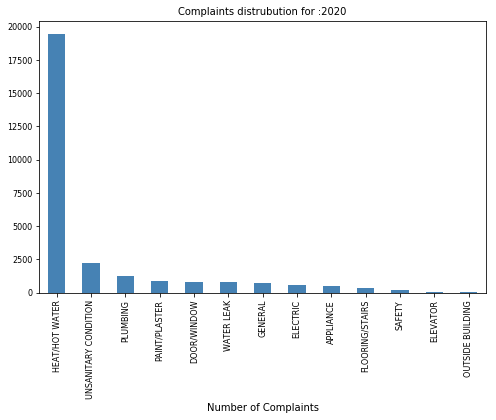

In [10]:
plot_complaint_type(2020)

HEAT/HOT WATER has highest number of complaints for year 2020, but the second largest complaint type heating is missing from this graph for 2020 also its not very clear from name the difference between HEATING and HEAT/HOT WATER complaint type. so lets analyze further. Plotting graphs year by year

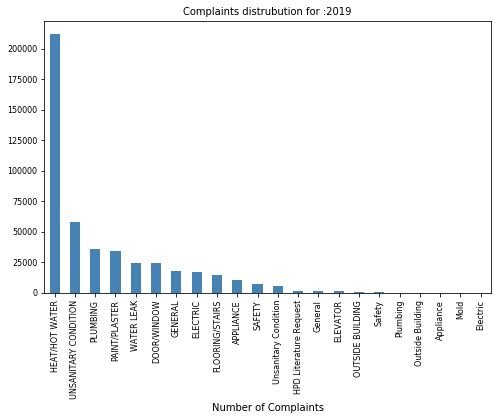

In [11]:
plot_complaint_type(2019)

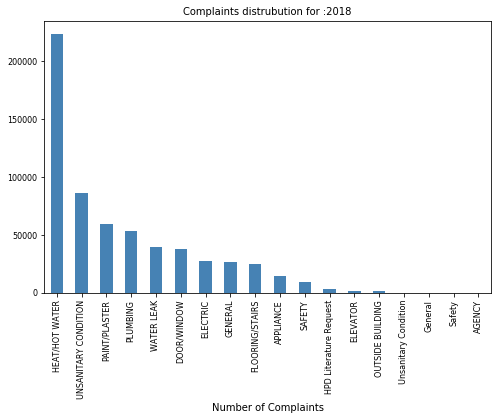

In [12]:
plot_complaint_type(2018)

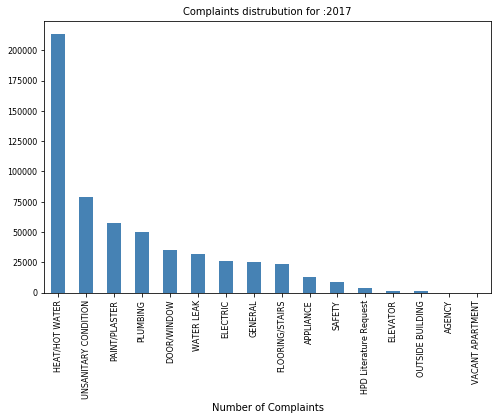

In [13]:
plot_complaint_type(2017)

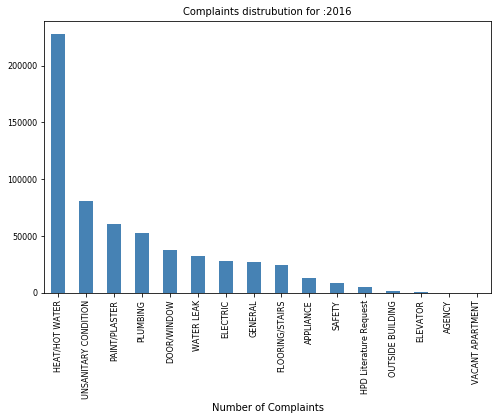

In [14]:
plot_complaint_type(2016)

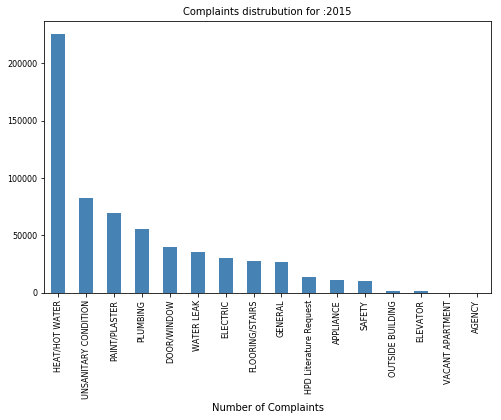

In [15]:
plot_complaint_type(2015)

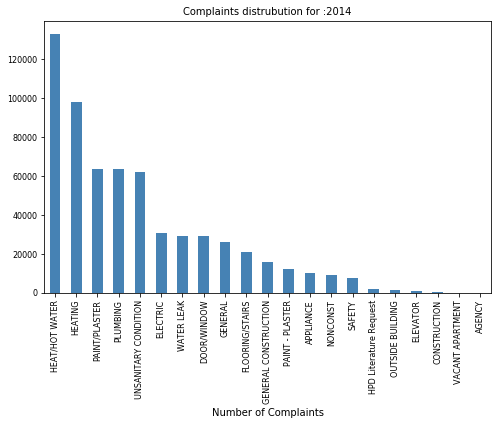

In [16]:
plot_complaint_type(2014)

Similar observation can be made for Years 2020,2019,2018,2017,2016 and 2015. HEAT/HOT WATER and HEATING both are visible for year 2014

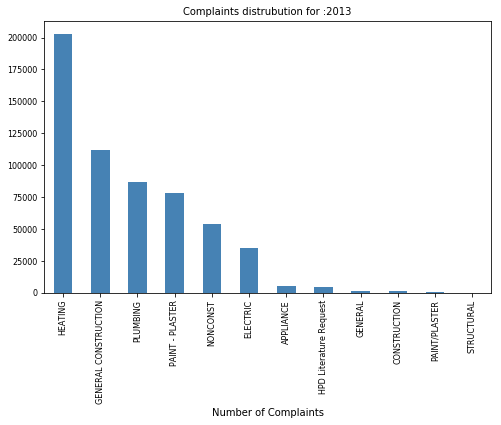

In [17]:
plot_complaint_type(2013)

In data set Heat/Hot Water has 1255319 complaints while Heating has 887869 complaints. So its clear that Heat/Hot water category should have highest priority. After carefully obeserving above plotted graphs namely : Complaints ditrubution for : 2013 to 2020. We can say that After 2014 they have merged both Heat/Hot water and Heating categories i.e Before 2014 as shown in 2013 graph only Heating category is visible and after 2014 i.e. in 2019 and 2020 only Heat/Hot water category is visible. Hence we have to merged this two categories and analyze them together

In [18]:
df_data['complaint_type'] = np.where(df_data['complaint_type']=='HEATING','HEAT/HOT WATER',df_data['complaint_type'])

In [19]:
df_data["complaint_type"].value_counts()

HEAT/HOT WATER            2143188
PLUMBING                   710635
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       450898
PAINT - PLASTER            361257
PAINT/PLASTER              346192
ELECTRIC                   307098
NONCONST                   260890
DOOR/WINDOW                204964
WATER LEAK                 193333
GENERAL                    151087
FLOORING/STAIRS            137291
APPLIANCE                  112659
HPD Literature Request      52830
SAFETY                      51445
OUTSIDE BUILDING             7129
ELEVATOR                     6715
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

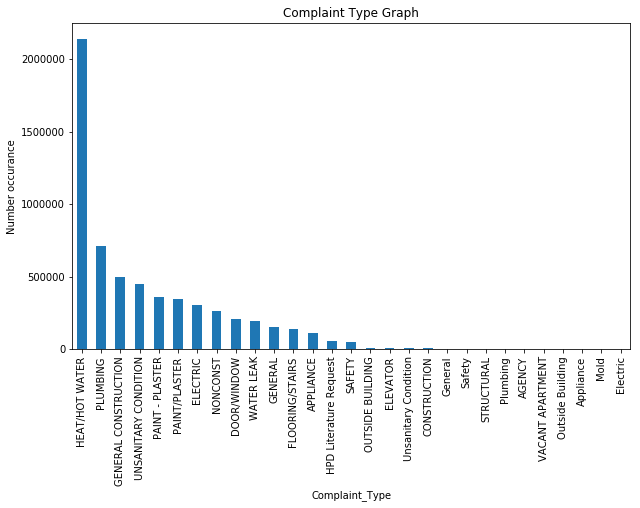

In [20]:
df_data["complaint_type"].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Complaint_Type') 
plt.ylabel('Number occurance')
plt.title('Complaint Type Graph') 
plt.show()

To gain more insight, Lets see which category had highest number of occurences, if we look at the yearwise distribution

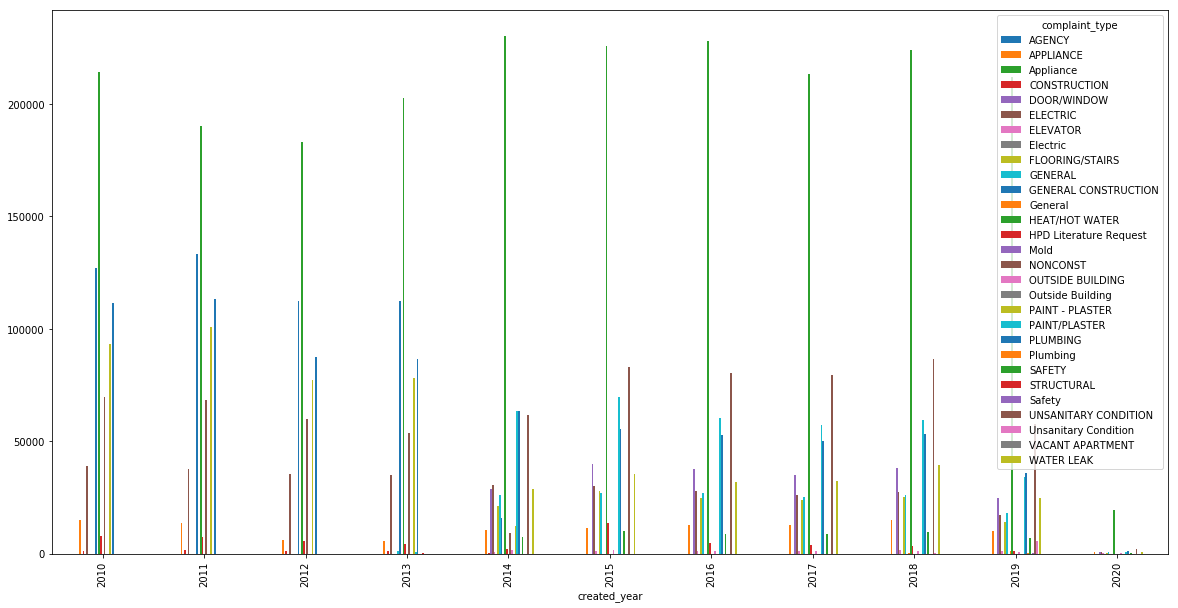

In [21]:
figure, axis = plt.subplots(figsize=(20,10))
# df_data.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot.bar(ax=ax)
df_grouped_data = df_data.groupby(['created_year', 'complaint_type']).count()
#unique_key coulmn is available in every row, so thats idea key to get the count
df_grouped_data = df_grouped_data['unique_key']
#we want bar graph of Complaint type counts vs created year graph i.e. X axis : created_year and Y axis : Complaint type counts
# Hence we need to unstack this dataframe at Level 1 so we can convert it from multiindex dataframe to single index
df_grouped_data = df_grouped_data.unstack()
df_grouped_data.plot(kind='bar', ax = axis)

# In conclusion we can say that HPD should address Heat/Hot water complaints first as it has highest number of occurences throughout all 10 years.